- Nama: Hanan Iqbal Alrahma
- Submisi NLP
- Dataset: [Emotion for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/code?datasetId=605165&sortBy=voteCount)

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset emotions/train.txt',sep=";", names=["Description","Emotion"])

In [3]:
data_train.head()

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
print(data_train.shape)

(16000, 2)


In [5]:
data_train['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

##Mengecek data

In [6]:
data_train.Emotion.value_counts() / data_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: Emotion, dtype: float64

<Axes: xlabel='Emotion', ylabel='count'>

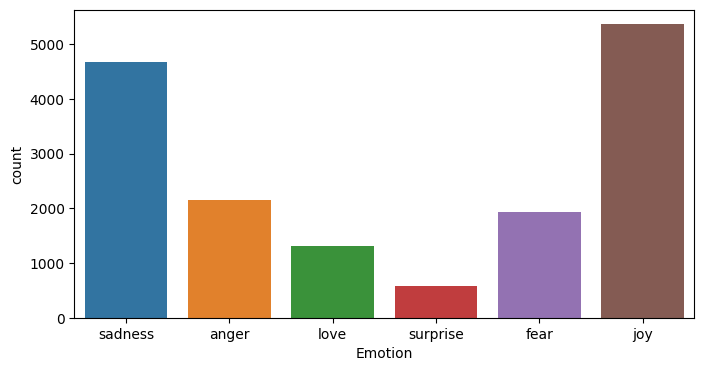

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data = data_train)

##Menghilangkan duplicated value

In [8]:
index = data_train[data_train.duplicated() == True].index
data_train.drop(index, axis = 0, inplace = True)
data_train.reset_index(inplace=True, drop = True)

In [9]:
data_train[data_train['Description'].duplicated() == True]

,Description,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


##Menghilangkan duplicated text

In [10]:
index = data_train[data_train['Description'].duplicated() == True].index
data_train.drop(index, axis = 0, inplace = True)
data_train.reset_index(inplace=True, drop = True)

##Menghitung stopword

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

temp =data_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Description'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: stop_words, dtype: int64

##Cleaning data

In [12]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('wordnet')
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Description=df.Description.apply(lambda text : lower_case(text))
    df.Description=df.Description.apply(lambda text : remove_stop_words(text))
    df.Description=df.Description.apply(lambda text : Removing_numbers(text))
    df.Description=df.Description.apply(lambda text : Removing_punctuations(text))
    df.Description=df.Description.apply(lambda text : Removing_urls(text))
    df.Description=df.Description.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
data_train = normalize_text(data_train)

In [14]:
data_train

,Description,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15964,brief time beanbag said anna feel like beaten,sadness
15965,turning feel pathetic still waiting table subb...,sadness
15966,feel strong good overall,joy
15967,feel like rude comment im glad,anger


##One-hot-encoding

In [15]:
cat_emotion = pd.get_dummies(data_train.Emotion)
new_data_train = pd.concat([data_train, cat_emotion], axis=1)
new_data_train = new_data_train.drop(columns='Emotion')
new_data_train

,Description,anger,fear,joy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15964,brief time beanbag said anna feel like beaten,0,0,0,0,1,0
15965,turning feel pathetic still waiting table subb...,0,0,0,0,1,0
15966,feel strong good overall,0,0,1,0,0,0
15967,feel like rude comment im glad,1,0,0,0,0,0


In [16]:
description = new_data_train['Description'].values
emotion = new_data_train[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values
desc_train, desc_test, emot_train, emot_test = train_test_split(description, emotion, test_size=0.2)

In [17]:
emotion

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [18]:
description

array(['didnt feel humiliated',
       'go feeling hopeless damned hopeful around someone care awake',
       'im grabbing minute post feel greedy wrong', ...,
       'feel strong good overall', 'feel like rude comment im glad',
       'know lot feel stupid portray'], dtype=object)

In [19]:
print("Shape of desc_train: ", desc_train.shape)
print("Shape of desc_test: ", desc_test.shape)

Shape of desc_train:  (12775,)
Shape of desc_test:  (3194,)


##Tokenizer

In [24]:
max_len = max([len(t) for t in data_train['Description']])
max_len

229

In [25]:
tok_oov = "UNK"
trunc_type = "pre"

tokenizer = Tokenizer(num_words=10000, oov_token=tok_oov)
tokenizer.fit_on_texts(desc_train)
tokenizer.fit_on_texts(desc_test)

sekuens_latih = tokenizer.texts_to_sequences(desc_train)
sekuens_test = tokenizer.texts_to_sequences(desc_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=max_len, truncating=trunc_type)
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

print(padded_test.shape)

(3194, 229)


In [26]:
vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 13480


##Membangun model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocabSize, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(64, dropout=0.2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy',optimizer = optimizer_adam,metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 64)           862720    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 904838 (3.45 MB)
Trainable params: 904838 

##Training

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\n akurasi telah terpenuhi")
callbacks = myCallback()

start_time = time.time()
num_epochs = 30
history = model.fit(padded_latih,
                    emot_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, emot_test),
                    callbacks = [callbacks],
                    verbose=2)
end_time = time.time()

training_time = end_time - start_time
training_time_minute = training_time / 60
print("Waktu training: {:.2f} detik".format(training_time))
print("Waktu training (menit): {:.2f} menit".format(training_time_minute))

Epoch 1/30
400/400 - 28s - loss: 1.7118 - accuracy: 0.3491 - val_loss: 1.2168 - val_accuracy: 0.5648 - 28s/epoch - 70ms/step
Epoch 2/30
400/400 - 6s - loss: 0.8625 - accuracy: 0.6877 - val_loss: 0.7261 - val_accuracy: 0.7242 - 6s/epoch - 16ms/step
Epoch 3/30
400/400 - 7s - loss: 0.5641 - accuracy: 0.8031 - val_loss: 0.5568 - val_accuracy: 0.8303 - 7s/epoch - 18ms/step
Epoch 4/30
400/400 - 5s - loss: 0.3672 - accuracy: 0.9000 - val_loss: 0.4566 - val_accuracy: 0.8654 - 5s/epoch - 12ms/step
Epoch 5/30
400/400 - 5s - loss: 0.2655 - accuracy: 0.9316 - val_loss: 0.4148 - val_accuracy: 0.8904 - 5s/epoch - 13ms/step
Epoch 6/30
400/400 - 6s - loss: 0.2122 - accuracy: 0.9479 - val_loss: 0.3733 - val_accuracy: 0.8961 - 6s/epoch - 14ms/step
Epoch 7/30
400/400 - 4s - loss: 0.1728 - accuracy: 0.9620 - val_loss: 0.3810 - val_accuracy: 0.8954 - 4s/epoch - 11ms/step
Epoch 8/30

 akurasi telah terpenuhi
400/400 - 4s - loss: 0.1422 - accuracy: 0.9686 - val_loss: 0.3749 - val_accuracy: 0.9033 - 4s/epoch 

##Grafik

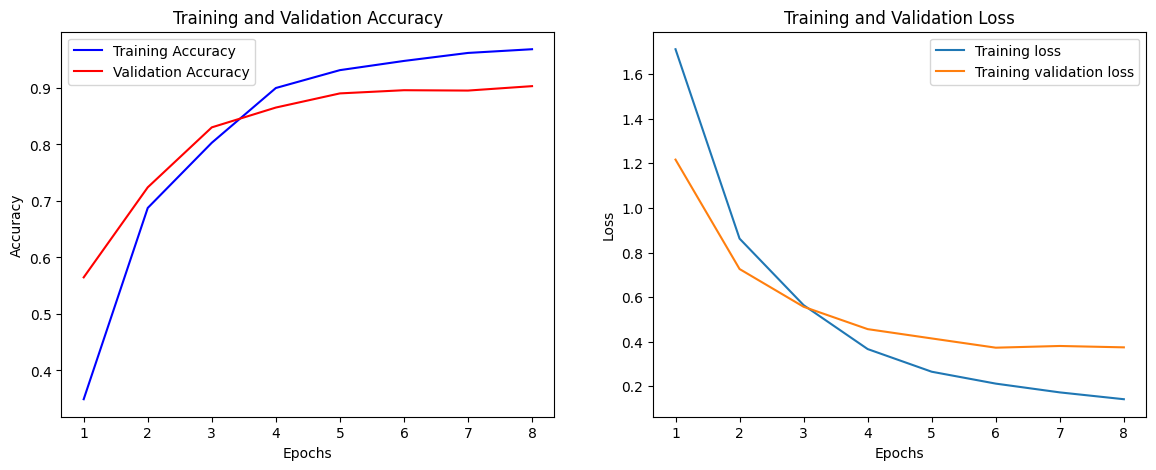

In [29]:
accuracy = history.history['accuracy']
validation = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plot grafik akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#plot grafik loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Training validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()